# Bank Loan Term Prediction
---

## Import packages & read data.

In [112]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Modeling imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn import linear_model, ensemble , tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df1 = pd.read_csv('credit_test.csv')
df2 = pd.read_csv('credit_train.csv')
df= pd.concat([df1,df2], axis=0, ignore_index=True)   # concat two dataset
df

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0,NaN
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0,NaN
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0,NaN
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0,NaN
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(110867, 19)

In [4]:
df.tail()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status
110862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

Loan ID                           867
Customer ID                       867
Current Loan Amount               867
Term                              867
Credit Score                    22002
Annual Income                   22002
Years in current job             5516
Home Ownership                    867
Purpose                           867
Monthly Debt                      867
Years of Credit History           867
Months since last delinquent    59314
Number of Open Accounts           867
Number of Credit Problems         867
Current Credit Balance            867
Maximum Open Credit               869
Bankruptcies                     1093
Tax Liens                         878
Loan Status                     10867
dtype: int64

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110867 entries, 0 to 110866
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       110000 non-null  object 
 1   Customer ID                   110000 non-null  object 
 2   Current Loan Amount           110000 non-null  float64
 3   Term                          110000 non-null  object 
 4   Credit Score                  88865 non-null   float64
 5   Annual Income                 88865 non-null   float64
 6   Years in current job          105351 non-null  object 
 7   Home Ownership                110000 non-null  object 
 8   Purpose                       110000 non-null  object 
 9   Monthly Debt                  110000 non-null  float64
 10  Years of Credit History       110000 non-null  float64
 11  Months since last delinquent  51553 non-null   float64
 12  Number of Open Accounts       110000 non-nul

In [7]:
duplicate = df.duplicated()
print(f'Duplicate in df :', duplicate.sum())

Duplicate in df : 11081


In [8]:
duplicate = df2.duplicated()
print(f'Duplicate in df :', duplicate.sum())

Duplicate in df : 10728


In [9]:
df2[df2['Loan ID'].duplicated()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
420,a1301a8a-e66e-4747-beb7-c2f243f2c689,ab46b1a7-f937-4ba9-ac98-270344120cf7,Fully Paid,152372.0,Short Term,697.0,845937.0,< 1 year,Rent,Debt Consolidation,2876.22,8.8,46.0,10.0,0.0,56943.0,215468.0,0.0,0.0
967,32200a7e-c65e-4e5e-9878-1161d256bcfe,64dcd3aa-3c82-4c70-929a-a83d249d894a,Fully Paid,99999999.0,Long Term,689.0,866799.0,9 years,Home Mortgage,Debt Consolidation,3676.69,14.1,7.0,4.0,2.0,86051.0,167750.0,2.0,0.0
1003,c5a1a3e9-da4a-4c9e-8d29-2907c613b82f,a239a831-642f-4cf8-926c-beac6ee5f36d,Fully Paid,448712.0,Long Term,696.0,1264602.0,NaN,Home Mortgage,Debt Consolidation,33722.91,16.7,22.0,28.0,2.0,328054.0,895906.0,0.0,2.0
1627,4c1d5195-f43a-44af-8322-f831800ce490,e849b404-a91e-4ffe-92f1-2a06e99d65a6,Fully Paid,751300.0,Short Term,716.0,3614978.0,6 years,Home Mortgage,Debt Consolidation,72600.71,11.9,69.0,29.0,0.0,957752.0,2128522.0,0.0,0.0
1828,191a92bd-67d1-4998-b680-08489937390d,0e0fa488-b6cb-444e-b3cf-c2021a74cad8,Fully Paid,341352.0,Long Term,712.0,751108.0,< 1 year,Home Mortgage,Debt Consolidation,10327.83,13.3,NaN,11.0,0.0,81377.0,110858.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.drop_duplicates()#.duplicated().sum()

**Rename columns for easer code writing**

In [11]:
df.columns

Index(['Loan ID', 'Customer ID', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Loan Status'],
      dtype='object')

In [12]:
df.columns = df.columns.str.replace(' ','_')

In [13]:
df.columns

Index(['Loan_ID', 'Customer_ID', 'Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens', 'Loan_Status'],
      dtype='object')

In [14]:
df[df.Loan_ID.duplicated()].sort_values(by=['Loan_ID'])

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
71233,0004f37b-5859-40f6-98d0-367aa3b3f3f1,f662b062-5fa5-463d-b5c0-4e36d09fcab1,301818.0,Short Term,NaN,NaN,1 year,Own Home,Home Improvements,14770.22,13.6,2.0,12.0,0.0,127680.0,1173370.0,0.0,0.0,Fully Paid
69930,00069ff1-a877-4d35-81be-7cd359b99956,ee3c27f2-766a-499c-9a96-d17c4d2faa16,31526.0,Short Term,716.0,2065965.0,10+ years,Home Mortgage,Home Improvements,49927.44,15.1,5.0,22.0,0.0,526414.0,1090386.0,0.0,0.0,Fully Paid
33519,000dbdf1-3926-4676-bb4f-fe40c242a46e,5165c688-1669-43e9-88b5-db212c72655c,99999999.0,Long Term,717.0,1688720.0,3 years,Home Mortgage,Debt Consolidation,35744.51,25.9,NaN,20.0,0.0,712633.0,1121142.0,0.0,0.0,Fully Paid
78970,000ea0cb-8d0e-4284-b8c8-444ffbbe4caf,db069b01-22c0-4b77-8b0a-b5704a0fd451,99999999.0,Short Term,715.0,1642303.0,10+ years,Rent,Debt Consolidation,41878.47,18.0,NaN,22.0,0.0,401565.0,756052.0,0.0,0.0,Fully Paid
62294,001312a5-ed3c-4930-9525-4d09c55ba7f4,982e93b2-ded4-443f-a64f-1df15eb9b7cd,762696.0,Long Term,705.0,2070145.0,6 years,Home Mortgage,major_purchase,16785.55,23.6,54.0,10.0,1.0,169214.0,473242.0,1.0,0.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91472,ffda589a-0175-4ea5-8ace-c3cc12a380fa,ef185a7b-a395-47a5-a9c3-bb15509dde16,106744.0,Short Term,NaN,NaN,3 years,Home Mortgage,Other,12403.20,9.9,NaN,8.0,0.0,135793.0,175692.0,0.0,0.0,Fully Paid
78116,ffee9aee-ac81-4237-87d2-6b6e625139ad,f397c9b0-e7e4-4319-841e-973a46fff949,151580.0,Short Term,NaN,NaN,1 year,Rent,other,5541.92,12.0,56.0,3.0,0.0,54739.0,80234.0,0.0,0.0,Fully Paid
23098,fff5063a-9366-4659-bdf3-bf8c6fafa9b5,4b13e0aa-ec50-472b-b8f1-60ee584bbbc9,112750.0,Short Term,722.0,272631.0,3 years,Rent,Debt Consolidation,1422.15,10.0,NaN,8.0,0.0,65683.0,277574.0,0.0,0.0,Fully Paid
22734,fff616e3-3b35-4529-a970-38f1bb02d6e1,cc11dbaa-0661-4f3b-81f6-79260b4ca0b0,606716.0,Long Term,712.0,2037693.0,4 years,Rent,Debt Consolidation,18339.18,14.0,11.0,11.0,0.0,265240.0,588368.0,0.0,0.0,Fully Paid


In [15]:
df.Loan_ID.value_counts()

c6e56547-516e-477e-8c0f-fc0bb5fea633    2
17c77c48-c4c1-4ef8-8f85-f08f9cd668ed    2
11f49297-7d9a-4118-8f68-633e1e5fb7dd    2
65c2a7dd-2765-4700-b629-25ad1caa5f63    2
6659fae5-6da4-4fef-b8b3-0984f4287270    2
                                       ..
e1a51a09-f016-44c8-b9a6-14d128435ada    1
10e64f4a-1a76-4519-b851-b9358a748e4c    1
2067bccc-c4e1-489f-96df-c259e5607db1    1
a502ee90-7f08-4a48-8510-f7c41c9fc2a5    1
2a41082c-318f-4472-8933-2221e2580f93    1
Name: Loan_ID, Length: 88354, dtype: int64

In [16]:
df[df.Loan_ID.duplicated()].Loan_ID.value_counts()

c6e56547-516e-477e-8c0f-fc0bb5fea633    1
fc2eec3a-a9e6-476e-902b-563b06bc899d    1
75ef09fa-fb1d-4ab6-bf18-382007ca1326    1
d46ae311-1111-460c-bad3-1387467e40dc    1
dc17c812-a350-459f-84dd-906fd42a5ab2    1
                                       ..
4d38ee27-9cd1-436f-b70e-d233ceea4339    1
be84a665-899b-4c27-8a5f-92e40f596f78    1
d8f315af-141d-4ff6-ab5e-bc3161d44ca1    1
5ec702cd-42d7-47b4-a9a5-6243008bb599    1
def4e213-d058-4107-90c9-79efd2121783    1
Name: Loan_ID, Length: 11431, dtype: int64

In [17]:
df[df.Loan_ID.duplicated()].sort_values(by=['Loan_ID', 'Customer_ID'])

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
71233,0004f37b-5859-40f6-98d0-367aa3b3f3f1,f662b062-5fa5-463d-b5c0-4e36d09fcab1,301818.0,Short Term,NaN,NaN,1 year,Own Home,Home Improvements,14770.22,13.6,2.0,12.0,0.0,127680.0,1173370.0,0.0,0.0,Fully Paid
69930,00069ff1-a877-4d35-81be-7cd359b99956,ee3c27f2-766a-499c-9a96-d17c4d2faa16,31526.0,Short Term,716.0,2065965.0,10+ years,Home Mortgage,Home Improvements,49927.44,15.1,5.0,22.0,0.0,526414.0,1090386.0,0.0,0.0,Fully Paid
33519,000dbdf1-3926-4676-bb4f-fe40c242a46e,5165c688-1669-43e9-88b5-db212c72655c,99999999.0,Long Term,717.0,1688720.0,3 years,Home Mortgage,Debt Consolidation,35744.51,25.9,NaN,20.0,0.0,712633.0,1121142.0,0.0,0.0,Fully Paid
78970,000ea0cb-8d0e-4284-b8c8-444ffbbe4caf,db069b01-22c0-4b77-8b0a-b5704a0fd451,99999999.0,Short Term,715.0,1642303.0,10+ years,Rent,Debt Consolidation,41878.47,18.0,NaN,22.0,0.0,401565.0,756052.0,0.0,0.0,Fully Paid
62294,001312a5-ed3c-4930-9525-4d09c55ba7f4,982e93b2-ded4-443f-a64f-1df15eb9b7cd,762696.0,Long Term,705.0,2070145.0,6 years,Home Mortgage,major_purchase,16785.55,23.6,54.0,10.0,1.0,169214.0,473242.0,1.0,0.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91472,ffda589a-0175-4ea5-8ace-c3cc12a380fa,ef185a7b-a395-47a5-a9c3-bb15509dde16,106744.0,Short Term,NaN,NaN,3 years,Home Mortgage,Other,12403.20,9.9,NaN,8.0,0.0,135793.0,175692.0,0.0,0.0,Fully Paid
78116,ffee9aee-ac81-4237-87d2-6b6e625139ad,f397c9b0-e7e4-4319-841e-973a46fff949,151580.0,Short Term,NaN,NaN,1 year,Rent,other,5541.92,12.0,56.0,3.0,0.0,54739.0,80234.0,0.0,0.0,Fully Paid
23098,fff5063a-9366-4659-bdf3-bf8c6fafa9b5,4b13e0aa-ec50-472b-b8f1-60ee584bbbc9,112750.0,Short Term,722.0,272631.0,3 years,Rent,Debt Consolidation,1422.15,10.0,NaN,8.0,0.0,65683.0,277574.0,0.0,0.0,Fully Paid
22734,fff616e3-3b35-4529-a970-38f1bb02d6e1,cc11dbaa-0661-4f3b-81f6-79260b4ca0b0,606716.0,Long Term,712.0,2037693.0,4 years,Rent,Debt Consolidation,18339.18,14.0,11.0,11.0,0.0,265240.0,588368.0,0.0,0.0,Fully Paid


In [18]:
df = df.dropna(subset = ['Loan_ID'])

In [19]:
df[df.Loan_ID.duplicated()]

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
10443,374bba0a-c0fe-46bf-a93f-b7aa70333d92,64f770d8-dec2-42e7-8955-6149ce7efd5f,479358.0,Short Term,NaN,NaN,10+ years,Rent,Debt Consolidation,22659.59,22.4,41.0,13.0,0.0,807462.0,1391302.0,0.0,0.0,Fully Paid
10461,206c7b26-db44-4c00-a637-3fcb931b3138,8823b7a8-9c0b-4f2d-a1dc-ffcb37ee4efb,311872.0,Long Term,680.0,1063810.0,6 years,Home Mortgage,Debt Consolidation,28191.06,12.2,NaN,10.0,0.0,391723.0,591338.0,0.0,0.0,Fully Paid
10521,8d6b94ba-d605-4336-b8af-773d83fac618,50b9be84-4a19-4005-b50a-016352734f4d,314226.0,Long Term,723.0,2638454.0,1 year,Home Mortgage,other,34959.43,18.2,54.0,10.0,0.0,662815.0,969034.0,0.0,0.0,Fully Paid
10528,ad5e29dd-d26e-43cc-b179-4a73451322f4,1eefc01a-2551-44c9-8305-0fd083e770ac,405856.0,Long Term,708.0,1155751.0,10+ years,Rent,Debt Consolidation,32264.85,22.7,NaN,13.0,0.0,338181.0,594198.0,0.0,0.0,Fully Paid
10570,75ef09fa-fb1d-4ab6-bf18-382007ca1326,3ee8dea0-7560-4a54-8cf2-18a196f68618,149116.0,Short Term,700.0,1380160.0,7 years,Home Mortgage,Home Improvements,18171.98,10.8,NaN,5.0,0.0,95171.0,112574.0,0.0,0.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110331,94eaa3d9-2b9f-467b-855f-9e8f5eae57a4,4dba3a9b-1a39-4464-88df-c7f8735944d1,431860.0,Long Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,8465.07,18.5,25.0,5.0,0.0,241319.0,476806.0,0.0,0.0,Fully Paid
110332,2e7e2e3b-db0b-418d-aae8-33991bb2a503,52aa2f3b-3385-42fe-8aaa-57abace6d762,766392.0,Short Term,717.0,1891070.0,7 years,Home Mortgage,Debt Consolidation,41130.82,15.4,NaN,20.0,1.0,604485.0,969430.0,1.0,0.0,Fully Paid
110338,3b2a09bb-3467-4d2f-bd8f-260fdc5760be,da2f2054-0f33-4b84-9234-508e42f6f493,179454.0,Short Term,708.0,1356068.0,4 years,Home Mortgage,Debt Consolidation,22318.54,22.7,21.0,25.0,0.0,387410.0,1705616.0,0.0,0.0,Fully Paid
110345,c568adaa-16f9-43d3-b522-8532fb57cb16,cbb29fd6-e418-4f09-a4bd-4de83428caab,48796.0,Short Term,NaN,NaN,4 years,Home Mortgage,major_purchase,8298.63,8.3,NaN,9.0,0.0,87875.0,239404.0,0.0,0.0,Fully Paid


In [20]:
df2[df2['Loan ID'] == 'c5a1a3e9-da4a-4c9e-8d29-2907c613b82f']

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
312,c5a1a3e9-da4a-4c9e-8d29-2907c613b82f,a239a831-642f-4cf8-926c-beac6ee5f36d,Fully Paid,448712.0,Long Term,696.0,1264602.0,NaN,Home Mortgage,Debt Consolidation,33722.91,16.7,22.0,28.0,2.0,328054.0,895906.0,0.0,2.0
1003,c5a1a3e9-da4a-4c9e-8d29-2907c613b82f,a239a831-642f-4cf8-926c-beac6ee5f36d,Fully Paid,448712.0,Long Term,696.0,1264602.0,NaN,Home Mortgage,Debt Consolidation,33722.91,16.7,22.0,28.0,2.0,328054.0,895906.0,0.0,2.0


In [21]:
df2[df2['Loan ID'].duplicated()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
420,a1301a8a-e66e-4747-beb7-c2f243f2c689,ab46b1a7-f937-4ba9-ac98-270344120cf7,Fully Paid,152372.0,Short Term,697.0,845937.0,< 1 year,Rent,Debt Consolidation,2876.22,8.8,46.0,10.0,0.0,56943.0,215468.0,0.0,0.0
967,32200a7e-c65e-4e5e-9878-1161d256bcfe,64dcd3aa-3c82-4c70-929a-a83d249d894a,Fully Paid,99999999.0,Long Term,689.0,866799.0,9 years,Home Mortgage,Debt Consolidation,3676.69,14.1,7.0,4.0,2.0,86051.0,167750.0,2.0,0.0
1003,c5a1a3e9-da4a-4c9e-8d29-2907c613b82f,a239a831-642f-4cf8-926c-beac6ee5f36d,Fully Paid,448712.0,Long Term,696.0,1264602.0,NaN,Home Mortgage,Debt Consolidation,33722.91,16.7,22.0,28.0,2.0,328054.0,895906.0,0.0,2.0
1627,4c1d5195-f43a-44af-8322-f831800ce490,e849b404-a91e-4ffe-92f1-2a06e99d65a6,Fully Paid,751300.0,Short Term,716.0,3614978.0,6 years,Home Mortgage,Debt Consolidation,72600.71,11.9,69.0,29.0,0.0,957752.0,2128522.0,0.0,0.0
1828,191a92bd-67d1-4998-b680-08489937390d,0e0fa488-b6cb-444e-b3cf-c2021a74cad8,Fully Paid,341352.0,Long Term,712.0,751108.0,< 1 year,Home Mortgage,Debt Consolidation,10327.83,13.3,NaN,11.0,0.0,81377.0,110858.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Split the data for train, validation and test

In [22]:
# split the data for train and test
df_Train, df_test = train_test_split(df, test_size = 0.2, random_state = 30 )

# split the train for train and val
df_train, df_val = train_test_split(df_Train, test_size = 0.2, random_state = 30 )

In [23]:
print(f'Shape of train:', df_train.shape)
print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (63862, 19)
Shape of validation: (15966, 19)
Shape of test: (19957, 19)


## Data Pre-processing

### Cleaning data

In [24]:
# reset index for train
df_train = df_train.reset_index(drop=True)

# reset index for val
df_val = df_val.reset_index(drop=True)

# reset index for val
df_test = df_test.reset_index(drop=True)

In [25]:
# dope nulls in Loan_ID

# for train
df_train = df_train.dropna(subset = ['Loan_ID'])

# for val
df_val = df_val.dropna(subset = ['Loan_ID'])

# for test
df_test = df_test.dropna(subset = ['Loan_ID'])

In [26]:
print(f'Shape of train:', df_train.shape)
print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (63862, 19)
Shape of validation: (15966, 19)
Shape of test: (19957, 19)


In [27]:
df_train.sample(20)

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
59398,428d8d83-786d-4843-a86b-081ab0554201,6e1d4a50-a42c-433d-9acb-6b51fffb9802,99999999.0,Long Term,740.0,2182815.0,10+ years,Home Mortgage,Debt Consolidation,23465.19,19.9,43.0,19.0,0.0,324273.0,1326754.0,0.0,0.0,Fully Paid
62007,c4fc6393-d99c-42b9-8148-01fba5a372a0,c85852ff-c3d2-4bac-b043-8e21fbc0bdc9,327140.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,10814.80,14.6,5.0,14.0,3.0,116413.0,607200.0,1.0,2.0,Fully Paid
9621,5154325a-a8ce-46f6-9b25-6f269c2f24b9,2e2bec49-1714-4bfc-8a2e-3420cd49596d,752532.0,Short Term,735.0,1885180.0,NaN,Rent,Business Loan,42887.94,21.7,NaN,14.0,0.0,496926.0,1157728.0,0.0,0.0,Fully Paid
47418,3c37d39a-46af-4b07-b117-70f8690b6100,4e24d1b6-3a59-4770-a420-1e1083a97056,107822.0,Short Term,747.0,679326.0,4 years,Rent,Debt Consolidation,10354.24,14.5,NaN,4.0,0.0,57475.0,138050.0,0.0,0.0,Fully Paid
58700,aeb58029-6b52-4c4e-81e0-14b7ae49bd8b,4bf36711-dbae-4847-ad2c-0345650a68b9,172458.0,Short Term,733.0,875121.0,1 year,Rent,Debt Consolidation,6796.68,19.7,67.0,7.0,0.0,64961.0,176968.0,0.0,0.0,NaN
11125,4649baa5-4498-4352-9213-005eb87bfdb2,abacbafa-d496-46d4-bf8d-d48bcbcbe970,461318.0,Long Term,NaN,NaN,4 years,Rent,Debt Consolidation,18971.50,15.8,NaN,13.0,0.0,414542.0,637450.0,0.0,0.0,Fully Paid
41521,3ef95042-1a37-4451-9c22-39599fc7ce7f,7d52a706-7136-4bae-bcb6-fd18e5c392aa,210056.0,Short Term,740.0,661409.0,1 year,Rent,Debt Consolidation,4431.37,12.0,NaN,5.0,0.0,161310.0,837562.0,0.0,0.0,Fully Paid
38102,0a94e8f8-99f0-44e2-9165-b5472d65698e,df5c32d2-82c2-44f3-a379-e09676e611ae,99999999.0,Short Term,734.0,1036336.0,4 years,Home Mortgage,Debt Consolidation,11658.59,15.3,61.0,5.0,1.0,46018.0,95986.0,1.0,0.0,Fully Paid
33381,3bea5ba0-5953-4b02-97e6-c3a24ea7e05e,ed13f60c-50b4-42f6-a7b0-e3dc666e645a,333036.0,Short Term,727.0,1629858.0,10+ years,Home Mortgage,Debt Consolidation,7904.76,21.0,NaN,9.0,0.0,281979.0,528330.0,0.0,0.0,Fully Paid
8211,0b80136f-9f57-45f9-ab34-9cc1345b3ed9,6cce7295-9905-4494-8663-2dd01ed10f95,437096.0,Short Term,680.0,1038103.0,10+ years,Rent,Business Loan,17388.23,13.1,64.0,7.0,0.0,112632.0,271106.0,0.0,0.0,Fully Paid


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63862 entries, 0 to 63861
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       63862 non-null  object 
 1   Customer_ID                   63862 non-null  object 
 2   Current_Loan_Amount           63862 non-null  float64
 3   Term                          63862 non-null  object 
 4   Credit_Score                  50388 non-null  float64
 5   Annual_Income                 50388 non-null  float64
 6   Years_in_current_job          61130 non-null  object 
 7   Home_Ownership                63862 non-null  object 
 8   Purpose                       63862 non-null  object 
 9   Monthly_Debt                  63862 non-null  float64
 10  Years_of_Credit_History       63862 non-null  float64
 11  Months_since_last_delinquent  29529 non-null  float64
 12  Number_of_Open_Accounts       63862 non-null  float64
 13  N

In [29]:
df_train.isna().sum()

Loan_ID                             0
Customer_ID                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                    13474
Annual_Income                   13474
Years_in_current_job             2732
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    34333
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 1
Bankruptcies                      146
Tax_Liens                           9
Loan_Status                      6409
dtype: int64

In [30]:
# check for dublicate

# for train
duplicate = df_train.duplicated()
print(f'Duplicate in train :', duplicate.sum())

# for val
duplicate = df_val.duplicated()
print(f'Duplicate in validation :', duplicate.sum())

# for test
duplicate = df_test.duplicated()
print(f'Duplicate in test :', duplicate.sum())

Duplicate in train : 0
Duplicate in validation : 0
Duplicate in test : 0


In [31]:
#df_train
df_train.Purpose.unique()
#df_val
df_val.Purpose.unique()
#da_test
df_test.Purpose.unique()

array(['Debt Consolidation', 'Business Loan', 'Buy a Car', 'other',
       'Home Improvements', 'Other', 'Medical Bills', 'Buy House',
       'Take a Trip', 'major_purchase', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'small_business',
       'renewable_energy'], dtype=object)

In [32]:
df_train.Purpose.value_counts()

Debt Consolidation      50432
other                    3740
Home Improvements        3703
Other                    2035
Business Loan             973
Buy a Car                 839
Medical Bills             709
Buy House                 387
Take a Trip               334
major_purchase            237
small_business            172
moving                     93
wedding                    74
Educational Expenses       74
vacation                   55
renewable_energy            5
Name: Purpose, dtype: int64

In [33]:
#df_train
df_train.Purpose = df_train.Purpose.str.replace('other','Other')
#df_val
df_val.Purpose = df_val.Purpose.str.replace('other','Other')
#df_test
df_test.Purpose = df_test.Purpose.str.replace('other','Other')

In [34]:
df_train.Purpose.value_counts()

Debt Consolidation      50432
Other                    5775
Home Improvements        3703
Business Loan             973
Buy a Car                 839
Medical Bills             709
Buy House                 387
Take a Trip               334
major_purchase            237
small_business            172
moving                     93
wedding                    74
Educational Expenses       74
vacation                   55
renewable_energy            5
Name: Purpose, dtype: int64

In [35]:
df_train.Purpose.unique()

array(['Debt Consolidation', 'Home Improvements', 'Other', 'vacation',
       'Business Loan', 'Buy House', 'Medical Bills', 'Buy a Car',
       'wedding', 'Take a Trip', 'small_business', 'major_purchase',
       'Educational Expenses', 'moving', 'renewable_energy'], dtype=object)

In [36]:
print(f'The duplicate in Loan ID in train:',df_train.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in train:',df_train.Customer_ID.duplicated().sum())
print(f'The duplicate in Loan ID in val:',df_val.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in val:',df_val.Customer_ID.duplicated().sum())
print(f'The duplicate in Loan ID in test:',df_test.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in test:',df_test.Customer_ID.duplicated().sum())

The duplicate in Loan ID in train: 4704
The duplicate in Customer ID in train: 4704
The duplicate in Loan ID in val: 302
The duplicate in Customer ID in val: 302
The duplicate in Loan ID in test: 453
The duplicate in Customer ID in test: 453


In [37]:
df_train['Loan_ID'].value_counts().sort_values(ascending=False)

7c57036a-0d06-4ec8-a342-763dcab2d418    2
fa49f86a-d814-45da-a593-28aa5891cadb    2
2925b3ef-8c48-4b70-825e-a6cca78ebbdf    2
b8c98072-91f5-450f-8e73-fa823da33a7a    2
6b5164db-bedd-44de-8cc6-4a41b3f7f23f    2
                                       ..
c03f3046-40a1-43a5-a85d-bd66bc4531b6    1
6075ff42-2352-41a5-a085-169cf0cae31d    1
446f3735-1d2b-4899-91e8-18979760a4ad    1
58ab642b-6ca8-40db-8e9f-d1441d461588    1
3e43ba22-b9e0-4931-aee6-7112b030e67c    1
Name: Loan_ID, Length: 59158, dtype: int64

In [38]:
df_train[df_train.Loan_ID.duplicated()]

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
1402,15a7f4ea-627d-4a66-aab2-fa9db02d119d,fb23508f-e762-496e-a854-97f15d806254,628144.0,Long Term,683.0,3196769.0,1 year,Rent,Debt Consolidation,19793.44,22.5,32.0,6.0,0.0,298566.0,909744.0,0.0,0.0,Fully Paid
2210,6bc74507-aa52-428a-be26-5a7ed2640794,23cbd7f3-a281-4e65-9316-dda896fb9d67,314578.0,Long Term,NaN,NaN,9 years,Rent,Debt Consolidation,10541.96,17.8,58.0,6.0,0.0,190779.0,264242.0,0.0,0.0,Fully Paid
2448,7da47527-a948-4afe-b811-e8c19dd4c978,84e51024-5719-418e-a87f-a6348d9cc378,215402.0,Long Term,NaN,NaN,3 years,Home Mortgage,Business Loan,13394.05,9.0,31.0,9.0,0.0,32566.0,369776.0,0.0,0.0,Fully Paid
2476,2ab15aa2-b29b-4ef4-849c-afa222b33e9c,e8fa5a5b-0b85-41b8-96fe-07e1d2a6d324,99999999.0,Short Term,723.0,2918039.0,4 years,Home Mortgage,Buy House,23660.51,16.3,NaN,9.0,0.0,599659.0,982102.0,0.0,0.0,Fully Paid
2796,42de1af5-6d81-45d8-bf15-8097d4b7d3ba,7756354a-f499-4f6f-9959-d63c75d80976,352572.0,Long Term,690.0,799273.0,6 years,Home Mortgage,Debt Consolidation,22845.98,17.6,37.0,22.0,0.0,348878.0,709984.0,0.0,0.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63843,457bee30-2bb0-4a36-a693-d229e1b1a5c6,e45c27f4-cc17-4a94-bfca-4bcfcb9b7cd9,529892.0,Long Term,716.0,1086895.0,< 1 year,Home Mortgage,Debt Consolidation,12952.30,15.9,23.0,11.0,0.0,228665.0,603130.0,0.0,0.0,Fully Paid
63848,5361da6c-18e8-40e5-8fe7-8bf34ae917ed,5a7206e1-e583-4c27-9e9a-e67738676971,87208.0,Short Term,716.0,753236.0,10+ years,Rent,Debt Consolidation,6841.90,13.5,5.0,19.0,0.0,153026.0,540188.0,0.0,0.0,Fully Paid
63852,56935f00-11bb-450b-bc7c-480c3d18ee07,a921c1e5-3222-4476-988c-45cf306b2cdf,80212.0,Short Term,706.0,577239.0,2 years,Rent,Debt Consolidation,15296.90,9.7,NaN,10.0,0.0,67184.0,287100.0,0.0,0.0,Fully Paid
63853,07e1c908-2c82-467d-9ad0-32843e271fff,391c7762-0704-4bc4-b123-799cad8b6473,31834.0,Short Term,716.0,1118226.0,1 year,Rent,Debt Consolidation,10623.09,21.2,NaN,8.0,1.0,36385.0,239338.0,1.0,0.0,NaN


In [39]:
df_train[df_train['Loan_ID'] == '96221533-e640-4d07-8967-159ee2d4e2bc']

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
12419,96221533-e640-4d07-8967-159ee2d4e2bc,6b16e5ef-88be-46ac-b9ed-f53c59cb50e9,99999999.0,Short Term,725.0,671783.0,6 years,Own Home,Debt Consolidation,10860.4,10.9,9.0,9.0,0.0,62890.0,131186.0,0.0,0.0,Fully Paid
41900,96221533-e640-4d07-8967-159ee2d4e2bc,6b16e5ef-88be-46ac-b9ed-f53c59cb50e9,133474.0,Short Term,725.0,671783.0,6 years,Own Home,Debt Consolidation,10860.4,10.9,9.0,9.0,0.0,62890.0,131186.0,0.0,0.0,NaN


In [40]:
df_train[df_train['Loan_ID'] == '74ae0921-87d9-4b86-88ab-d69889cab050']

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
26969,74ae0921-87d9-4b86-88ab-d69889cab050,7ab40a1d-f0e9-429a-97fa-dedf3879afd4,429132.0,Long Term,721.0,1436134.0,10+ years,Home Mortgage,Debt Consolidation,16754.96,22.0,47.0,10.0,2.0,161690.0,306944.0,0.0,0.0,Fully Paid
38338,74ae0921-87d9-4b86-88ab-d69889cab050,7ab40a1d-f0e9-429a-97fa-dedf3879afd4,99999999.0,Long Term,721.0,1436134.0,10+ years,Home Mortgage,Debt Consolidation,16754.96,22.0,47.0,10.0,2.0,161690.0,306944.0,0.0,0.0,Fully Paid


**The repetition becouse the loan status has been changed from charged off to fully paid. and the current loan amount got some errors**

In [41]:
df_train[(df_train.Loan_ID.duplicated() & (df_train['Current_Loan_Amount'] == 99999999.0))]

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
2476,2ab15aa2-b29b-4ef4-849c-afa222b33e9c,e8fa5a5b-0b85-41b8-96fe-07e1d2a6d324,99999999.0,Short Term,723.0,2918039.0,4 years,Home Mortgage,Buy House,23660.51,16.3,NaN,9.0,0.0,599659.0,982102.0,0.0,0.0,Fully Paid
2917,c1893946-c725-4dd7-ae64-d7c7c05fef81,f4dddacb-819f-46f1-83ff-caf8c021a73e,99999999.0,Short Term,719.0,2369661.0,6 years,HaveMortgage,Take a Trip,45615.96,30.4,NaN,16.0,0.0,1034968.0,1396714.0,0.0,0.0,Fully Paid
3054,50a38f75-c99a-4495-9933-fc21333430a6,4fe01afd-1092-47ba-9327-adf3fe819a9d,99999999.0,Short Term,665.0,928321.0,10+ years,Rent,Other,15781.59,12.7,79.0,8.0,1.0,41211.0,90530.0,0.0,1.0,Fully Paid
3323,d349f2cd-7d30-4c99-9f80-575d94190c49,2b92bb67-de1a-44b6-b1f8-7ac54909fa92,99999999.0,Long Term,691.0,993605.0,10+ years,Home Mortgage,Debt Consolidation,15483.86,15.7,NaN,9.0,2.0,104709.0,267036.0,2.0,0.0,Fully Paid
3437,fb36ccc2-a13f-478f-ab0f-daf2c0c56c12,b23048af-3c40-443c-b8ac-4b9568d5a8f7,99999999.0,Long Term,601.0,1095502.0,6 years,Rent,Debt Consolidation,19536.37,9.6,22.0,28.0,0.0,136857.0,319506.0,0.0,0.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63682,6f8232ec-63ec-482a-8515-44083b50cc01,b72cda39-7d5a-46e2-b8f7-3b86dd199bc4,99999999.0,Short Term,725.0,1760407.0,10+ years,Home Mortgage,Debt Consolidation,26259.33,20.2,16.0,17.0,0.0,132297.0,270182.0,0.0,0.0,Fully Paid
63711,b7e7162b-8cde-4972-ae95-ea122d0dccae,716fec9a-d973-48ec-b5f2-84f4dfe78298,99999999.0,Long Term,713.0,2597870.0,3 years,Rent,Debt Consolidation,19462.46,13.3,NaN,7.0,0.0,286729.0,529518.0,0.0,0.0,Fully Paid
63712,a0de359d-d053-45fa-96aa-f20af8b59d75,548be6db-d7ce-4889-8ed7-1f04d97b1439,99999999.0,Short Term,707.0,814910.0,< 1 year,Rent,Debt Consolidation,4964.13,14.0,NaN,13.0,1.0,114570.0,377960.0,0.0,0.0,Fully Paid
63799,73d37a8b-3d5c-429e-ad81-d96878b96e36,086b9677-42da-41a9-983b-661a1b18fbfa,99999999.0,Short Term,721.0,1316035.0,3 years,Home Mortgage,Home Improvements,20398.40,18.2,19.0,7.0,0.0,151525.0,186032.0,0.0,0.0,Fully Paid


In [42]:
df_train[df_train['Loan_ID'] == '312f4bfa-ec4d-4ca6-8442-061843479ee4']

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
37365,312f4bfa-ec4d-4ca6-8442-061843479ee4,45a3403d-d80d-4d51-b8ac-f13cfc8da42e,336270.0,Short Term,712.0,861859.0,10+ years,Own Home,Debt Consolidation,7160.53,19.6,NaN,7.0,0.0,253213.0,319044.0,0.0,0.0,Fully Paid


In [43]:
# drop duplicate in Loan_ID and Current_Loan_Amount = 99999999.0

# for train
df_train = df_train[~(df_train.Loan_ID.duplicated() & (df_train['Current_Loan_Amount'] == 99999999.0))]

# for val
df_val = df_val[~(df_val.Loan_ID.duplicated() & (df_val['Current_Loan_Amount'] == 99999999.0))]

# for test
df_test = df_test[~(df_test.Loan_ID.duplicated() & (df_test['Current_Loan_Amount'] == 99999999.0))]

In [44]:
df_train[(df_train.Loan_ID.duplicated() & (df_train['Current_Loan_Amount'] == 99999999.0))]

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status


In [45]:
print(f'The duplicate in Loan ID in train:',df_train.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in train:',df_train.Customer_ID.duplicated().sum())

print(f'The duplicate in Loan ID in val:',df_val.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in val:',df_val.Customer_ID.duplicated().sum())

print(f'The duplicate in Loan ID in test:',df_test.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in test:',df_test.Customer_ID.duplicated().sum())

The duplicate in Loan ID in train: 3788
The duplicate in Customer ID in train: 3788
The duplicate in Loan ID in val: 247
The duplicate in Customer ID in val: 247
The duplicate in Loan ID in test: 363
The duplicate in Customer ID in test: 363


In [46]:
df_train[~(df_train.Loan_ID.duplicated())]

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
0,b57686aa-9859-49d3-bf5f-72874b99c8bb,15682df3-0db0-48b7-ad38-abdc04dff75e,263428.0,Short Term,NaN,NaN,10+ years,Rent,Debt Consolidation,11651.18,13.8,68.0,13.0,0.0,178999.0,285494.0,0.0,0.0,Fully Paid
1,0a201880-e240-498e-af7a-3f1340e039e1,091040db-e0e5-45bf-9889-fbdf451ff06c,133694.0,Short Term,717.0,376200.0,NaN,Rent,Debt Consolidation,7868.85,24.9,NaN,18.0,1.0,168701.0,564564.0,1.0,0.0,Fully Paid
2,a59ab4b0-f306-4322-98e6-1087526a4a5d,691218b7-a37f-4121-b67a-a3005dc33fcd,438394.0,Short Term,740.0,1547360.0,10+ years,Home Mortgage,Debt Consolidation,18826.15,33.6,NaN,9.0,0.0,762831.0,1731906.0,0.0,0.0,Fully Paid
3,ad825cf4-c5c2-48f1-b287-09cd50a86af5,d9f9e00d-6ffd-4345-918f-1e549f760191,387530.0,Long Term,NaN,NaN,< 1 year,Own Home,Debt Consolidation,17780.01,19.9,NaN,31.0,0.0,536541.0,1415172.0,0.0,0.0,Fully Paid
4,c4bf413e-9183-4cfd-aec4-141db8d4fc27,2d32fa0f-f7d3-4944-a051-649ff8396826,716628.0,Short Term,NaN,NaN,3 years,Home Mortgage,Home Improvements,10783.83,20.0,53.0,10.0,0.0,362881.0,1277144.0,0.0,0.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63857,a778ccb8-a77b-4864-8b79-4ecc2df2becd,bebaa82a-e6c5-4870-a838-1cfbe2c2b3be,427284.0,Short Term,739.0,2428694.0,4 years,Rent,Debt Consolidation,47966.83,26.2,NaN,13.0,0.0,942343.0,1185998.0,0.0,0.0,Charged Off
63858,50f99e5c-645b-4c3d-b054-3366545199b0,3a5b7fea-2085-4c70-a26d-170a5afc525a,247764.0,Short Term,740.0,680827.0,2 years,Own Home,Debt Consolidation,12425.05,6.8,NaN,6.0,0.0,172577.0,358116.0,0.0,0.0,Fully Paid
63859,b365c7e3-0468-42fb-9938-8ea1d2e9106e,2b849dd9-9752-4b79-98e8-edc76069836c,173822.0,Short Term,723.0,780596.0,< 1 year,Own Home,Debt Consolidation,22181.93,10.0,NaN,9.0,0.0,101992.0,265364.0,0.0,0.0,Fully Paid
63860,066baa34-b771-4db7-ad68-6a6ef9a47727,93fe42ed-c215-4ab1-a4b5-29b3b0375ed8,351120.0,Long Term,NaN,NaN,8 years,Home Mortgage,Debt Consolidation,21400.65,32.1,NaN,16.0,0.0,214985.0,658526.0,0.0,0.0,Fully Paid


In [47]:
df_train[df_train['Loan_ID'] == '0ebba27b-5518-4de6-9ad9-c07d759d7c8e']

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
16417,0ebba27b-5518-4de6-9ad9-c07d759d7c8e,88f3302e-8e1b-43a6-865a-afd6e2ecf510,238590.0,Short Term,NaN,NaN,4 years,Home Mortgage,Debt Consolidation,10529.42,10.4,NaN,8.0,0.0,161253.0,418638.0,0.0,0.0,NaN


In [48]:
df_train[df_train['Loan_ID'] == 'e8107bb2-253a-4efe-bb9d-d1706a0eba2f']

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
14296,e8107bb2-253a-4efe-bb9d-d1706a0eba2f,945297c2-f802-49a1-bf36-d14ba5470835,780472.0,Short Term,NaN,NaN,10+ years,Own Home,Debt Consolidation,54570.85,24.3,16.0,8.0,0.0,574978.0,816882.0,0.0,0.0,NaN
28555,e8107bb2-253a-4efe-bb9d-d1706a0eba2f,945297c2-f802-49a1-bf36-d14ba5470835,780472.0,Short Term,688.0,1943168.0,10+ years,Own Home,Debt Consolidation,54570.85,24.3,16.0,8.0,0.0,574978.0,816882.0,0.0,0.0,Fully Paid


In [49]:
df_train[df_train['Loan_ID'] == 'a2598c9b-5c6d-42e5-a08c-84d60101126c']

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status


In [50]:
# # fill Loan_Status nulls with '' to apply conditon to remove the duplicate in Loan_ID

# # for train
# df_train['Loan_Status'] = df_train['Loan_Status'].fillna('')

# # for val
# df_val['Loan_Status'] = df_val['Loan_Status'].fillna('')

# # for test
# df_test['Loan_Status'] = df_test['Loan_Status'].fillna('')

In [51]:
# # drop duplicate in Loan_ID and Loan_Status = 0

# # for train
# df_train = df_train[~(df_train.Loan_ID.duplicated() & (df_train['Loan_Status'] == ''))]

# # for val
# df_val = df_val[~(df_val.Loan_ID.duplicated() & (df_val['Loan_Status'] == ''))]

# # for test
# df_test = df_test[~(df_test.Loan_ID.duplicated() & (df_test['Loan_Status'] == ''))]

In [52]:
df_train[df_train['Loan_ID'] == 'a2598c9b-5c6d-42e5-a08c-84d60101126c']

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status


In [53]:
# # dope duplicated in Loan_ID

# # for train
# df_train = df_train.drop_duplicates(subset = ['Loan_ID'])

# # for val
# df_val = df_val.drop_duplicates(subset = ['Loan_ID'])

# # for test
# df_test = df_test.drop_duplicates(subset = ['Loan_ID'])

In [54]:
df_train[df_train['Loan_ID'] == 'f7409cb7-9f21-4aca-9379-fd180c485ea4']

,Loan_ID,Customer_ID,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens,Loan_Status
8127,f7409cb7-9f21-4aca-9379-fd180c485ea4,b0b929e2-3ae2-4729-b306-146364476c4b,351010.0,Long Term,718.0,2084148.0,< 1 year,Own Home,Debt Consolidation,20494.16,8.5,NaN,6.0,0.0,287470.0,401522.0,0.0,0.0,Fully Paid


In [55]:
df_train['Loan_Status'].isna().sum()

6329

In [56]:
# dope nulls in Loan_Status

# for train
df_train = df_train.dropna(subset = ['Loan_Status'])

# for val
df_val = df_val.dropna(subset = ['Loan_Status'])

# for test
df_test = df_test.dropna(subset = ['Loan_Status'])

In [57]:
print(f'The duplicate in Loan ID in train:',df_train.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in train:',df_train.Customer_ID.duplicated().sum())

print(f'The duplicate in Loan ID in val:',df_val.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in val:',df_val.Customer_ID.duplicated().sum())

print(f'The duplicate in Loan ID in test:',df_test.Loan_ID.duplicated().sum())
print(f'The duplicate in Customer ID in test:',df_test.Customer_ID.duplicated().sum())

The duplicate in Loan ID in train: 2437
The duplicate in Customer ID in train: 2437
The duplicate in Loan ID in val: 165
The duplicate in Customer ID in val: 165
The duplicate in Loan ID in test: 236
The duplicate in Customer ID in test: 236


In [58]:
# check again for dublicate

# for train
duplicate = df_train.duplicated()
print(f'Duplicate in train :', duplicate.sum())

# for val
duplicate = df_val.duplicated()
print(f'Duplicate in validation :', duplicate.sum())

# for test
duplicate = df_test.duplicated()
print(f'Duplicate in test :', duplicate.sum())

Duplicate in train : 0
Duplicate in validation : 0
Duplicate in test : 0


In [59]:
df_train.isnull().sum() # train

Loan_ID                             0
Customer_ID                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                    12201
Annual_Income                   12201
Years_in_current_job             2431
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    30541
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 1
Bankruptcies                      128
Tax_Liens                           8
Loan_Status                         0
dtype: int64

In [60]:
# drop nulls in Annual_Income

# for train
df_train = df_train[~df_train.Annual_Income.isna()]

# for val
df_val = df_val[~df_val.Annual_Income.isna()]

# for test
df_test = df_test[~df_test.Annual_Income.isna()]

In [61]:
print(f'Shape of train:', df_train.shape)
print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (44416, 19)
Shape of validation: (11198, 19)
Shape of test: (14048, 19)


In [62]:
df_train.isnull().sum() # train

Loan_ID                             0
Customer_ID                         0
Current_Loan_Amount                 0
Term                                0
Credit_Score                        0
Annual_Income                       0
Years_in_current_job             1896
Home_Ownership                      0
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    23884
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 0
Bankruptcies                       93
Tax_Liens                           4
Loan_Status                         0
dtype: int64

In [63]:
df_train['Credit_Score'].nunique()

320

In [64]:
# fill nulls in Years_in_current_job & Months_since_last_delinquent

# for train
df_train['Years_in_current_job'] = df_train['Years_in_current_job'].fillna(0)
df_train['Months_since_last_delinquent'] = df_train['Months_since_last_delinquent'].fillna(0)


# for val
df_val['Years_in_current_job'] = df_val['Years_in_current_job'].fillna(0)
df_val['Months_since_last_delinquent'] = df_val['Months_since_last_delinquent'].fillna(0)


# for test
df_test['Years_in_current_job'] = df_test['Years_in_current_job'].fillna(0)
df_test['Months_since_last_delinquent'] = df_test['Months_since_last_delinquent'].fillna(0)

In [65]:
df_train.isnull().sum()

Loan_ID                          0
Customer_ID                      0
Current_Loan_Amount              0
Term                             0
Credit_Score                     0
Annual_Income                    0
Years_in_current_job             0
Home_Ownership                   0
Purpose                          0
Monthly_Debt                     0
Years_of_Credit_History          0
Months_since_last_delinquent     0
Number_of_Open_Accounts          0
Number_of_Credit_Problems        0
Current_Credit_Balance           0
Maximum_Open_Credit              0
Bankruptcies                    93
Tax_Liens                        4
Loan_Status                      0
dtype: int64

In [66]:
# drop nulls 

# for train
df_train = df_train.dropna()

# for val
df_val = df_val.dropna()

# for test
df_test = df_test.dropna()

In [67]:
df_train.isnull().sum()

Loan_ID                         0
Customer_ID                     0
Current_Loan_Amount             0
Term                            0
Credit_Score                    0
Annual_Income                   0
Years_in_current_job            0
Home_Ownership                  0
Purpose                         0
Monthly_Debt                    0
Years_of_Credit_History         0
Months_since_last_delinquent    0
Number_of_Open_Accounts         0
Number_of_Credit_Problems       0
Current_Credit_Balance          0
Maximum_Open_Credit             0
Bankruptcies                    0
Tax_Liens                       0
Loan_Status                     0
dtype: int64

In [68]:
df_val.isnull().sum()

Loan_ID                         0
Customer_ID                     0
Current_Loan_Amount             0
Term                            0
Credit_Score                    0
Annual_Income                   0
Years_in_current_job            0
Home_Ownership                  0
Purpose                         0
Monthly_Debt                    0
Years_of_Credit_History         0
Months_since_last_delinquent    0
Number_of_Open_Accounts         0
Number_of_Credit_Problems       0
Current_Credit_Balance          0
Maximum_Open_Credit             0
Bankruptcies                    0
Tax_Liens                       0
Loan_Status                     0
dtype: int64

In [69]:
df_train.duplicated().sum()

0

In [70]:
df_train.drop_duplicates(keep=False, inplace=True)

In [71]:
df_train.duplicated().sum()

0

In [72]:
df_train.value_counts().sum()

44323

In [73]:
df_train.Years_in_current_job.value_counts()

10+ years    13829
2 years       4077
< 1 year      3626
3 years       3621
5 years       3032
1 year        2848
4 years       2692
6 years       2499
7 years       2443
8 years       2013
0             1896
9 years       1747
Name: Years_in_current_job, dtype: int64

In [74]:
# Convert the Years_in_current_job into INT

#df_train
df_train['Years_in_current_job'] = df_train['Years_in_current_job'].replace(['10+ years'],"10 years");

#df_val
df_val['Years_in_current_job'] = df_val['Years_in_current_job'].replace(['10+ years'],"10 years");

#df_test
df_test['Years_in_current_job'] = df_test['Years_in_current_job'].replace(['10+ years'],"10 years");


In [75]:
#df_train
df_train['Years_in_current_job'] = df_train['Years_in_current_job'].replace(['< 1 year'],"1 year");
#df_val
df_val['Years_in_current_job'] = df_val['Years_in_current_job'].replace(['< 1 year'],"1 year");
#df_test
df_test['Years_in_current_job'] = df_test['Years_in_current_job'].replace(['< 1 year'],"1 year");

In [76]:
#DF_TRAIN
df_train['Years_in_current_job'] = df_train.Years_in_current_job.str.strip('years')
#df_val
df_val['Years_in_current_job'] = df_val.Years_in_current_job.str.strip('years')
#df_test
df_test['Years_in_current_job'] = df_test.Years_in_current_job.str.strip('years')

In [77]:
df_train.Years_in_current_job.value_counts()

10     13829
1       6474
2       4077
3       3621
5       3032
4       2692
6       2499
7       2443
8       2013
9       1747
Name: Years_in_current_job, dtype: int64

In [78]:
df_train.Years_in_current_job.isna().sum()

1896

In [79]:
# train
median = df_train['Years_in_current_job'].median()
df_train['Years_in_current_job'].fillna(median, inplace=True)

# val
median = df_val['Years_in_current_job'].median()
df_val['Years_in_current_job'].fillna(median, inplace=True)

# test
median = df_test['Years_in_current_job'].median()
df_test['Years_in_current_job'].fillna(median, inplace=True)

In [80]:
# train
df_train['Years_in_current_job']= df_train['Years_in_current_job'].astype(int)
# val
df_val['Years_in_current_job']= df_val['Years_in_current_job'].astype(int)
# test
df_test['Years_in_current_job']= df_test['Years_in_current_job'].astype(int)

In [81]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44323 entries, 1 to 63859
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_ID                       44323 non-null  object 
 1   Customer_ID                   44323 non-null  object 
 2   Current_Loan_Amount           44323 non-null  float64
 3   Term                          44323 non-null  object 
 4   Credit_Score                  44323 non-null  float64
 5   Annual_Income                 44323 non-null  float64
 6   Years_in_current_job          44323 non-null  int64  
 7   Home_Ownership                44323 non-null  object 
 8   Purpose                       44323 non-null  object 
 9   Monthly_Debt                  44323 non-null  float64
 10  Years_of_Credit_History       44323 non-null  float64
 11  Months_since_last_delinquent  44323 non-null  float64
 12  Number_of_Open_Accounts       44323 non-null  float64
 13  N

## Feature Engneering
---

In [82]:
#Get Dummies

In [83]:
# train
lone_train = df_train.select_dtypes(exclude=['object']).copy()
bank_lone1 = df_train.loc[:,['Term','Home_Ownership','Purpose','Loan_Status']]
df_train_id = df_train.loc[:,['Loan_ID','Customer_ID']]

# val
lone_val = df_val.select_dtypes(exclude=['object']).copy()
bank_lone2 = df_val.loc[:,['Term','Home_Ownership','Purpose','Loan_Status']]
df_val_id = df_val.loc[:,['Loan_ID','Customer_ID']]

# test
lone_test = df_test.select_dtypes(exclude=['object']).copy()
bank_lone3 = df_test.loc[:,['Term','Home_Ownership','Purpose','Loan_Status']]
df_test_id = df_test.loc[:,['Loan_ID','Customer_ID']]

In [84]:
# train

df_dum_lone_train = pd.get_dummies(bank_lone1, drop_first=True)
bank_lone_train = pd.concat([lone_train, df_dum_lone_train, df_train_id], axis=1)

# val
df_dum_lone_val = pd.get_dummies(bank_lone2, drop_first=True)
bank_lone_val = pd.concat([lone_val, df_dum_lone_val, df_val_id], axis=1)

# test
df_dum_lone_test = pd.get_dummies(bank_lone3, drop_first=True)
bank_lone_test = pd.concat([lone_test, df_dum_lone_test, df_test_id], axis=1)

In [85]:
bank_lone_train.columns

Index(['Current_Loan_Amount', 'Credit_Score', 'Annual_Income',
       'Years_in_current_job', 'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens', 'Term_Short Term',
       'Home_Ownership_Home Mortgage', 'Home_Ownership_Own Home',
       'Home_Ownership_Rent', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Educational Expenses',
       'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other',
       'Purpose_Take a Trip', 'Purpose_major_purchase', 'Purpose_moving',
       'Purpose_renewable_energy', 'Purpose_small_business',
       'Purpose_vacation', 'Purpose_wedding', 'Loan_Status_Fully Paid',
       'Loan_ID', 'Customer_ID'],
      dtype='object')

In [86]:
bank_lone_train = bank_lone_train[~((bank_lone_train.Loan_ID.duplicated()) 
                                    & (bank_lone_train['Loan_Status_Fully Paid'] == 0)) ]

In [87]:
df_train.corr()

,Current_Loan_Amount,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
Current_Loan_Amount,1.000000,-0.106444,0.014802,-0.003819,-0.011723,0.027241,-0.002758,-0.001114,-0.003910,0.002772,-0.000586,-0.000798,-0.002129
Credit_Score,-0.106444,1.000000,-0.012528,-0.005411,0.000598,-0.017040,-0.006509,0.010024,-0.002519,0.003947,-0.002679,-0.007854,0.006278
Annual_Income,0.014802,-0.012528,1.000000,0.071287,0.426721,0.144414,0.010071,0.130335,-0.020184,0.276140,0.034814,-0.043624,0.029132
Years_in_current_job,-0.003819,-0.005411,0.071287,1.000000,0.132630,0.217227,0.047613,0.053603,0.038538,0.095618,0.000655,0.037086,0.015493
Monthly_Debt,-0.011723,0.000598,0.426721,0.132630,1.000000,0.196640,0.008579,0.414926,-0.054285,0.483850,0.042355,-0.077189,0.022001
Years_of_Credit_History,0.027241,-0.017040,0.144414,0.217227,0.196640,1.000000,0.085149,0.132881,0.059421,0.203311,0.027702,0.058967,0.021375
Months_since_last_delinquent,-0.002758,-0.006509,0.010071,0.047613,0.008579,0.085149,1.000000,0.034881,0.081087,-0.068639,-0.006456,0.056220,0.031455
Number_of_Open_Accounts,-0.001114,0.010024,0.130335,0.053603,0.414926,0.132881,0.034881,1.000000,-0.017360,0.220115,0.030274,-0.028061,0.006010
Number_of_Credit_Problems,-0.003910,-0.002519,-0.020184,0.038538,-0.054285,0.059421,0.081087,-0.017360,1.000000,-0.107429,-0.011071,0.755545,0.574834
Current_Credit_Balance,0.002772,0.003947,0.276140,0.095618,0.483850,0.203311,-0.068639,0.220115,-0.107429,1.000000,0.129161,-0.116842,-0.014712


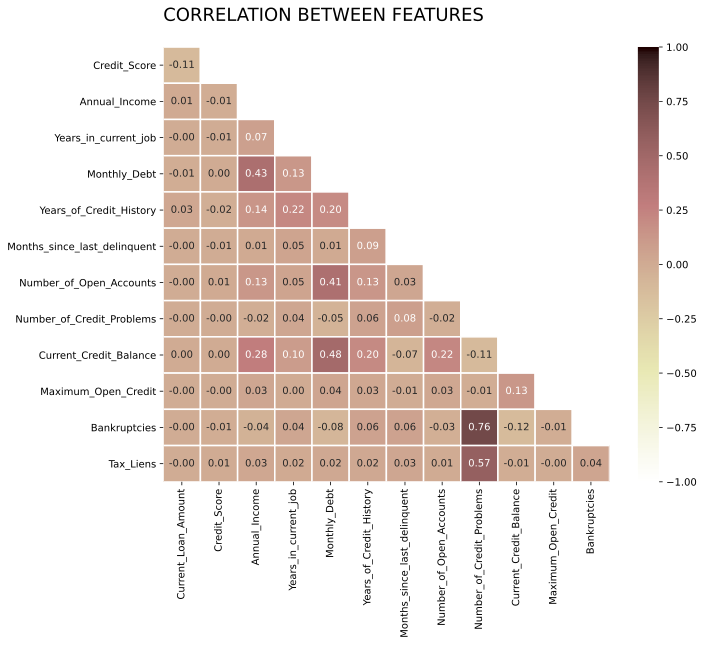

In [88]:
plt.figure(figsize=(10,8))

# corr
data_corr = df_train.corr()
# data_corr = bank_lone_train.corr()

# mask
mask = np.triu(np.ones_like(data_corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = data_corr.iloc[1:,:-1].copy()

sns.heatmap(corr, cmap = 'pink_r', annot = True, vmin= -1, vmax= 1, linewidths=1.5, fmt='.2f', mask=mask);
plt.title('CORRELATION BETWEEN FEATURES\n', loc='left', fontsize=18);
# plt.savefig('plot13.png', dpi = 300, bbox_inches = 'tight');

## Visualize data
___

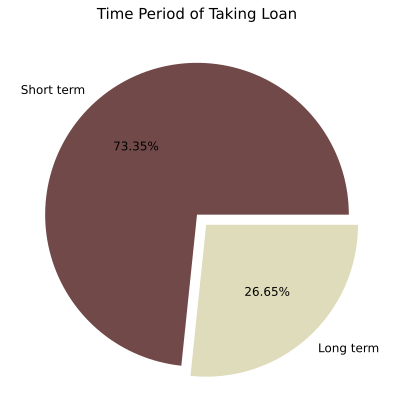

In [89]:
c = ['#724949','#cfa691', '#120f0f', '#a06868']
plt.figure(figsize=(7,7))
plt.pie(x = bank_lone_train['Term_Short Term'].value_counts(),
        labels=['Short term','Long term'],autopct='%.2f%%',
        textprops={'fontsize': 12},explode=[0,0.09], colors = ['#724949','#DEDCBB'])
plt.title('Time Period of Taking Loan',fontdict={'fontsize':15});

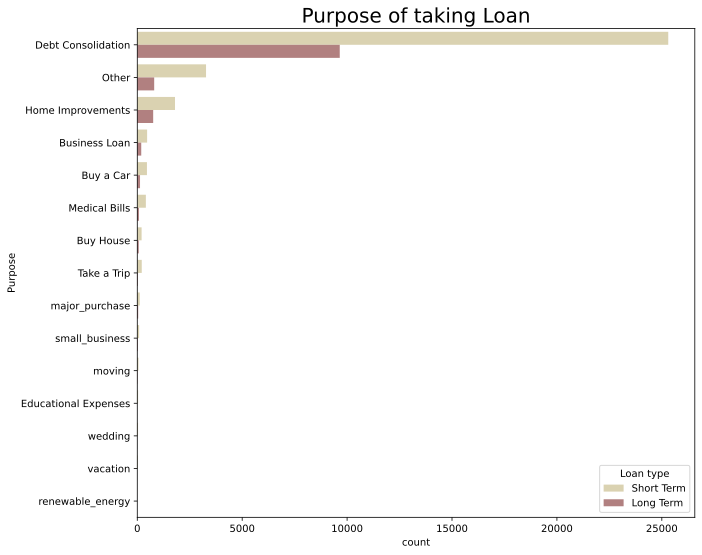

In [90]:
plt.figure(figsize=(10,9))
sns.countplot(y='Purpose' , data=df_train, order = df_train['Purpose'].value_counts().index,
              hue='Term', palette = 'pink_r')
plt.title('Purpose of taking Loan' , fontdict={'fontsize':20})
plt.legend(title="Loan type", loc="lower right");

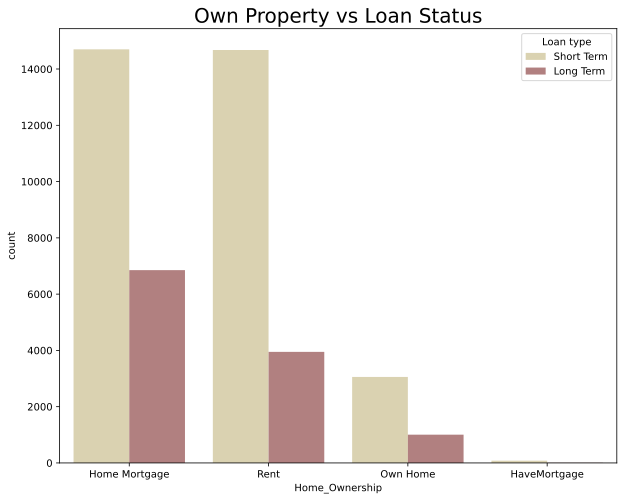

In [91]:
plt.figure(figsize=(10,8))
sns.countplot(x='Home_Ownership',data=df_train ,order = df_train['Home_Ownership'].value_counts().index
              ,hue='Term',  palette = 'pink_r')
plt.title('Own Property vs Loan Status',fontdict={'fontsize':20})
plt.legend(title="Loan type", loc="upper right", labels=["Short Term","Long Term"]);

## KNN Model
---

In [95]:
X_train = bank_lone_train.drop(['Term_Short Term','Loan_ID','Customer_ID'], axis = 1)
y_train = bank_lone_train['Term_Short Term']
X_val = bank_lone_val.drop(['Term_Short Term','Loan_ID','Customer_ID'], axis = 1)
y_val = bank_lone_val['Term_Short Term']

In [96]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(44323, 31)
(44323,)
(11168, 31)
(11168,)


In [97]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
print('The accuracy for training : ',knn.score(X_train,y_train))
print('The accuracy for validation: ',knn.score(X_val,y_val))
print('f1_score for train: ',f1_score(knn.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(knn.predict(X_val), y_val))

The accuracy for training :  0.8127383074250389
The accuracy for validation:  0.7309276504297995
f1_score for train:  0.8776785451115631
f1_score for validation:  0.8232872684504557


## Logistic Regression
---

In [105]:
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

print('The accuracy for training : ',LR.score(X_train,y_train))
print('The accuracy for validation: ',LR.score(X_val,y_val))
print('f1_score for train: ',f1_score(LR.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(LR.predict(X_val), y_val))

The accuracy for training :  0.7334341087020283
The accuracy for validation:  0.7266296561604585
f1_score for train:  0.8461488378149619
f1_score for validation:  0.8416083009079118


## Decision Tree Classifier
---

In [101]:
Decision_Tree = DecisionTreeClassifier(max_depth = 8)
Decision_Tree.fit(X_train, y_train)
print('The accuracy for training : ',Decision_Tree.score(X_train,y_train))
print('The accuracy for validation: ',Decision_Tree.score(X_val,y_val))
print('f1_score for train: ',f1_score(Decision_Tree.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(Decision_Tree.predict(X_val), y_val))

The accuracy for training :  0.8420684520452135
The accuracy for validation:  0.8221704871060171
f1_score for train:  0.8946132305561411
f1_score for validation:  0.8805341674687199


## Random Forest Classifier
---

In [107]:
Random_Forest = ensemble.RandomForestClassifier(n_estimators = 100, random_state=1)
Random_Forest.fit(X_train, y_train)
print('The accuracy for training : ',Random_Forest.score(X_train,y_train))
print('The accuracy for validation: ',Random_Forest.score(X_val,y_val))
print('f1_score for train: ',f1_score(Random_Forest.predict(X_train), y_train))
print('f1_score for validation: ',f1_score(Random_Forest.predict(X_val), y_val))

The accuracy for training :  1.0
The accuracy for validation:  0.8361389684813754
f1_score for train:  1.0
f1_score for validation:  0.8917031601372944


## Voting Classifer (HARD)
---

In [120]:
models = [LogisticRegression, KNeighborsClassifier, ensemble.RandomForestClassifier, DecisionTreeClassifier]

In [121]:
VC = VotingClassifier(estimators= models,
                                    voting='hard',
                                    n_jobs=-1)

VC.fit(X_train, y_train)

TypeError: 'type' object is not iterable

In [110]:
for model_name in models:
    
    curr_model = eval(model_name)
    
    curr_model.fit(X_train, y_train)